In [5]:
import torch
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


GPU name: NVIDIA GeForce RTX 2080


In [42]:
# Path to your raw EPC CSV
file = "../data/raw/D_EPC_data_2025Q2/2015Q3.csv"

# Load just the first 10,000 rows for a safe preview
df = pd.read_csv(file, nrows=10000, low_memory=False)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:20])  # first 20 columns


COLUMNS = df.iloc[0].tolist()
print(COLUMNS)

df.drop(0,  inplace=True)

Shape: (10000, 106)
Columns: ['BUILDING_REFERENCE_NUMBER', 'OSG_REFERENCE_NUMBER', 'ADDRESS1', 'ADDRESS2', 'ADDRESS3', 'POSTCODE', 'INSPECTION_DATE', 'TYPE_OF_ASSESSMENT', 'LODGEMENT_DATE', 'ENERGY_CONSUMPTION_CURRENT', 'TOTAL_FLOOR_AREA', '3_YR_ENERGY_COST_CURRENT', '3_YR_ENERGY_SAVINGS_POTENTIAL', 'CURRENT_ENERGY_EFFICIENCY', 'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_RATING', 'ENVIRONMENT_IMPACT_CURRENT', 'CURRENT_ENVIRONMENTAL_RATING', 'ENVIRONMENT_IMPACT_POTENTIAL']
['Property_UPRN', 'OSG_UPRN', 'ADDRESS1', 'ADDRESS2', 'POST_TOWN', 'Postcode', 'Date of Assessment', 'Type of Assessment', 'Date of Certificate', 'Primary Energy Indicator (kWh/m�/year)', 'Total floor area (m�)', 'Total current energy costs over 3 years (�)', 'Potential future savings over 3 years (�)', 'Current energy efficiency rating', 'Current energy efficiency rating band', 'Potential Energy Efficiency Rating', 'Potential energy efficiency rating band', 'Current Environmental Impact 

[('rating', 81756), ('after', 81756), ('improvement', 81756), ('energy', 48413), ('description', 40878), ('indicative', 40878), ('cost', 40878), ('typical', 40878), ('saving', 40878), ('environmental', 40878), ('green', 40878), ('deal', 40878), ('eligible', 40878), ('insulation', 11804), ('floor', 11264), ('solar', 9531), ('low', 8270), ('boiler', 7922), ('for', 7599), ('lighting', 7535)]


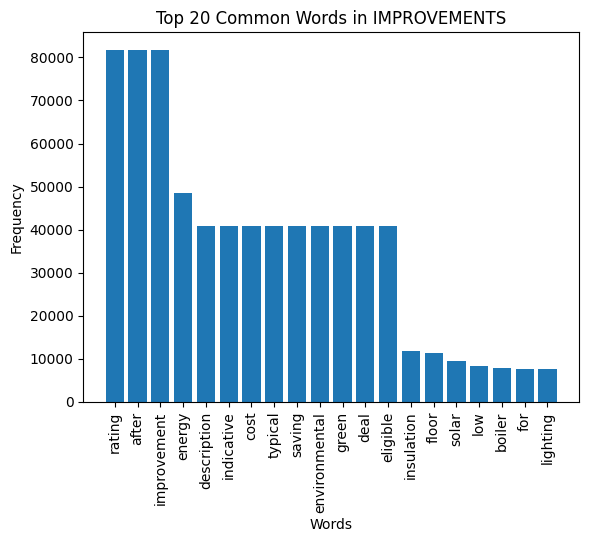

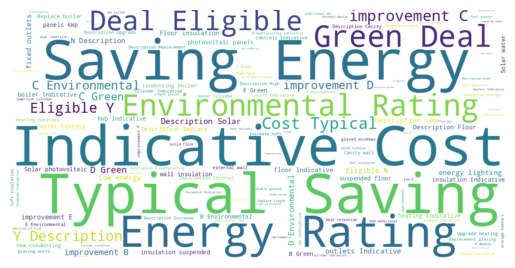

In [44]:
# Show some improvement recommendations
df["IMPROVEMENTS"].dropna().head(10).tolist()
from collections import Counter
import re

text_data = " ".join(df["IMPROVEMENTS"].dropna().astype(str).tolist())
words = re.findall(r"\b[a-zA-Z]{3,}\b", text_data.lower())
common_words = Counter(words).most_common(20)
print(common_words)

#Plot common words
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 20 Common Words in IMPROVEMENTS")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=1200, height=600, background_color="white").generate(text_data)
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()



In [45]:
# Take the first few rows
sample = df["IMPROVEMENTS"].dropna().head(10)

# Split each improvement string by '|'
split_improvements = sample.apply(lambda x: [imp.strip() for imp in x.split('|') if imp.strip()])

for row in split_improvements:
    print(row)
    print("-" * 80)


['Description: Solar photovoltaic panels, 2.5 kWp; Indicative Cost: £5,000 - £8,000; Typical Saving: 249; Energy Rating after improvement: D 68; Environmental Rating after improvement: D 57; Green Deal Eligible: Y', 'Description: Replace boiler with new condensing boiler; Indicative Cost: £2,200 - £3,000; Typical Saving: 549; Energy Rating after improvement: D 61; Environmental Rating after improvement: E 51; Green Deal Eligible: Y', 'Description: Floor insulation (suspended floor); Indicative Cost: £800 - £1,200; Typical Saving: 77; Energy Rating after improvement: E 47; Environmental Rating after improvement: F 38; Green Deal Eligible: Y', 'Description: Low energy lighting for all fixed outlets; Indicative Cost: £95; Typical Saving: 59; Energy Rating after improvement: E 48; Environmental Rating after improvement: F 38; Green Deal Eligible: N', 'Description: Solar water heating; Indicative Cost: £4,000 - £6,000; Typical Saving: 43; Energy Rating after improvement: D 62; Environmental

In [46]:
import re

def parse_improvement(text):
    measure = re.findall(r"Description: (.*?);", text)
    cost = re.findall(r"Indicative Cost: (.*?);", text)
    saving = re.findall(r"Typical Saving: (\d+)", text)
    rating = re.findall(r"Energy Rating after improvement: ([A-G])", text)

    return {
        "measure": measure[0] if measure else None,
        "cost": cost[0] if cost else None,
        "saving": int(saving[0]) if saving else None,
        "rating": rating[0] if rating else None
    }

# Test on one improvement
example = split_improvements.iloc[0][0]
print(example)
print(parse_improvement(example))

records = []
for row in df["IMPROVEMENTS"].dropna().head(100):  # just test 100 rows for now
    for imp in row.split('|'):
        imp = imp.strip()
        if imp:
            records.append(parse_improvement(imp))

df_improvements = pd.DataFrame(records)
df_improvements.head()



Description: Solar photovoltaic panels, 2.5 kWp; Indicative Cost: £5,000 - £8,000; Typical Saving: 249; Energy Rating after improvement: D 68; Environmental Rating after improvement: D 57; Green Deal Eligible: Y
{'measure': 'Solar photovoltaic panels, 2.5 kWp', 'cost': '£5,000 - £8,000', 'saving': 249, 'rating': 'D'}


,measure,cost,saving,rating
0,"Solar photovoltaic panels, 2.5 kWp","£5,000 - £8,000",249,D
1,Replace boiler with new condensing boiler,"£2,200 - £3,000",549,D
2,Floor insulation (suspended floor),"£800 - £1,200",77,E
3,Low energy lighting for all fixed outlets,£95,59,E
4,Solar water heating,"£4,000 - £6,000",43,D
